# Code Comparisons

------

Tested Models include:

+ ARC
+ Process
+ ACT 1 & 2
+ Prev Code

In [1]:
using FusionSystems

Main.IJulia.set_current_module(FusionSystems)

return

In [2]:
cur_points = 160

cur_temps = linspace(0, 40, cur_points)

cur_decks = [:pulsed, :arc, :act_1, :act_2]

return

In [3]:
cur_solutions = Dict()

for cur_deck in cur_decks
    tmp_symbol = Symbol("$(cur_deck)_solution")
    isdefined(FusionSystems, tmp_symbol) || continue
    cur_solutions[cur_deck] = getfield(FusionSystems, tmp_symbol)()
end

In [4]:
cur_sweeps = Dict()

for cur_deck in cur_decks
    @time cur_sweeps[cur_deck] = Sweep(cur_temps, deck=cur_deck)
end

println("done.")

  6.998011 seconds (59.67 M allocations: 1001.505 MiB, 3.36% gc time)
  2.475696 seconds (25.91 M allocations: 428.764 MiB, 5.01% gc time)
  2.224682 seconds (33.82 M allocations: 549.290 MiB, 7.21% gc time)
  2.213733 seconds (25.39 M allocations: 413.950 MiB, 5.96% gc time)
done.


In [5]:
using Interact
using Plots

cur_fields = [ 
  "T_bar", "n_bar", "I_P", "R_0", "B_0",
  "tau_E", "p_bar", "P_F", "f_BS", "W_M", "cost", "eta_CD",
  "norm_beta_N", "norm_q_95", "norm_q_DV", "norm_P_E", "norm_P_W"
]

sort!(cur_fields)

cur_xvars = deepcopy(cur_fields)
cur_yvars = deepcopy(cur_fields)

filter!(cur_var -> cur_var != "B_0", cur_xvars)
filter!(cur_var -> cur_var != "R_0", cur_yvars)

unshift!(cur_xvars, "B_0")
unshift!(cur_yvars, "R_0")

return

INFO: Interact.jl: using new nbwidgetsextension protocol


In [6]:
function add_limit!(cur_dict::Dict, tmp_sweep::Sweep, cur_limit::Symbol, cur_x::Symbol, cur_y::Symbol, maxx::Integer)
    cur_dict[cur_limit] = Dict(
        :x => get_limit_vars(tmp_sweep, cur_limit, cur_x, cur_last=maxx),
        :y => get_limit_vars(tmp_sweep, cur_limit, cur_y, cur_last=maxx),
        :t => get_limit_vars(tmp_sweep, cur_limit, :T_bar, cur_last=maxx)
    )
    
    nan_list = []
    
    append!(nan_list, find(isnan, cur_dict[cur_limit][:x]))
    append!(nan_list, find(isnan, cur_dict[cur_limit][:y]))
    append!(nan_list, find(isnan, cur_dict[cur_limit][:t]))
    
    nan_list = unique(nan_list)
    
    isempty(nan_list) && return
    
    deleteat!(cur_dict[cur_limit][:x], nan_list)
    deleteat!(cur_dict[cur_limit][:y], nan_list)
    deleteat!(cur_dict[cur_limit][:t], nan_list)
end

add_limit! (generic function with 1 method)

Interact.Options{:ToggleButtons,Bool}(43: "input-19" = true Bool , "legend", true, "true", 1, Interact.OptionDict(DataStructures.OrderedDict("true"=>true,"false"=>false), Dict(false=>"false",true=>"true")), Any[], Any[], true, "horizontal", true)

Interact.Textbox{Int64}(45: "input-20" = 0 Int64 , "xmax", nothing, 0)

Interact.Textbox{Int64}(47: "input-21" = 0 Int64 , "ymax", nothing, 0)

Interact.Options{:ToggleButtons,String}(49: "input-22" = B_0 String , "xvar", "B_0", "B_0", 1, Interact.OptionDict(DataStructures.OrderedDict("B_0"=>"B_0","I_P"=>"I_P","P_F"=>"P_F","R_0"=>"R_0","T_bar"=>"T_bar","W_M"=>"W_M","cost"=>"cost","eta_CD"=>"eta_CD","f_BS"=>"f_BS","n_bar"=>"n_bar"…), Dict("W_M"=>"W_M","I_P"=>"I_P","n_bar"=>"n_bar","B_0"=>"B_0","R_0"=>"R_0","eta_CD"=>"eta_CD","norm_q_DV"=>"norm_q_DV","p_bar"=>"p_bar","norm_P_W"=>"norm_P_W","norm_q_95"=>"norm_q_95"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:ToggleButtons,String}(51: "input-23" = R_0 String , "yvar", "R_0", "R_0", 1, Interact.OptionDict(DataStructures.OrderedDict("R_0"=>"R_0","B_0"=>"B_0","I_P"=>"I_P","P_F"=>"P_F","T_bar"=>"T_bar","W_M"=>"W_M","cost"=>"cost","eta_CD"=>"eta_CD","f_BS"=>"f_BS","n_bar"=>"n_bar"…), Dict("W_M"=>"W_M","I_P"=>"I_P","n_bar"=>"n_bar","R_0"=>"R_0","B_0"=>"B_0","eta_CD"=>"eta_CD","norm_q_DV"=>"norm_q_DV","p_bar"=>"p_bar","norm_P_W"=>"norm_P_W","norm_q_95"=>"norm_q_95"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:ToggleButtons,Symbol}(53: "input-24" = pulsed Symbol , "sweep", :pulsed, "pulsed", 1, Interact.OptionDict(DataStructures.OrderedDict("pulsed"=>:pulsed,"arc"=>:arc,"act_1"=>:act_1,"act_2"=>:act_2), Dict(:act_1=>"act_1",:pulsed=>"pulsed",:arc=>"arc",:act_2=>"act_2")), Any[], Any[], true, "horizontal", true)

hmm


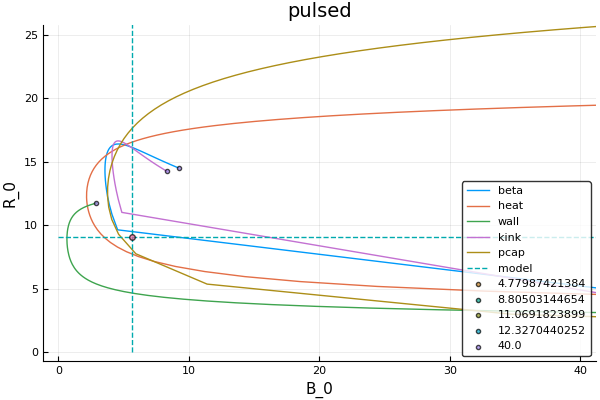

hmm
hmm
hmm


In [12]:
@manipulate for legend=[true,false], xmax=0, ymax=0, xvar=cur_xvars, yvar=cur_yvars, sweep=cur_decks
    beta=true
    kink=true 
    pcap=true 
    wall=true 
    heat=true
    
    tmp_sweep = cur_sweeps[sweep]
    
    maxx = cur_points
    
    plot()

    cur_x = Symbol(xvar)
    cur_y = Symbol(yvar)
    
    cur_dict = Dict()
    
    beta && add_limit!(cur_dict, tmp_sweep, :beta, cur_x, cur_y, maxx)
    kink && add_limit!(cur_dict, tmp_sweep, :kink, cur_x, cur_y, maxx)
    pcap && add_limit!(cur_dict, tmp_sweep, :pcap, cur_x, cur_y, maxx)
    wall && add_limit!(cur_dict, tmp_sweep, :wall, cur_x, cur_y, maxx)
    heat && add_limit!(cur_dict, tmp_sweep, :heat, cur_x, cur_y, maxx)

    for (cur_key, cur_value) in cur_dict
        plot!(
            cur_value[:x], 
            cur_value[:y],
            label=cur_key
        )
    end
  
    t_pool = []
    x_pool = []
    y_pool = []
    
    for cur_value in values(cur_dict)
        append!(t_pool, cur_value[:t])
        append!(x_pool, cur_value[:x])
        append!(y_pool, cur_value[:y])
    end
    
    if haskey(cur_solutions, sweep)
        cur_solution = cur_solutions[sweep]
        
        cur_cursor_x = getfield(cur_solution, Symbol(xvar))
        cur_cursor_y = getfield(cur_solution, Symbol(yvar))
        
        tmp_xmax = ( xmax > 0 ) ? xmax : maximum(x_pool)
        tmp_ymax = ( ymax > 0 ) ? ymax : maximum(y_pool) 
        
        if cur_cursor_x == nothing && cur_cursor_y == nothing
            # do nothing
        elseif cur_cursor_x == nothing
            plot!(
                [ 0 , tmp_xmax ],
                [ cur_cursor_y , cur_cursor_y ],
                label="model", linestyle=:dash
            )
        elseif cur_cursor_y == nothing
            plot!(
                [ cur_cursor_x , cur_cursor_x ],
                [ 0 , tmp_ymax ],
                label="model", linestyle=:dash
            )
        else
            println("hmm")
            plot!(
                [ cur_cursor_x , cur_cursor_x , NaN , 0 , tmp_xmax ],
                [ 0 , tmp_ymax , NaN , cur_cursor_y , cur_cursor_y ],
                label="model", linestyle=:dash
            )

            scatter!(
                [cur_cursor_x], [cur_cursor_y], 
                label="", alpha=0.7, markersize=4
            )
        end
    end
    
    cur_min_pairs = Dict()
    cur_max_pairs = Dict()
    
    for cur_value in values(cur_dict)
        cur_min, cur_min_index = findmin(cur_value[:t])
        cur_max, cur_max_index = findmax(cur_value[:t])
        
        cur_min_tuple = (
            cur_value[:x][cur_min_index],
            cur_value[:y][cur_min_index]
        )
        
        if in(cur_min, keys(cur_min_pairs))
            push!(
                cur_min_pairs[cur_min],
                cur_min_tuple
            )
        else
            cur_min_pairs[cur_min] = [cur_min_tuple]
        end
        
        cur_max_tuple = (
            cur_value[:x][cur_max_index],
            cur_value[:y][cur_max_index]
        )
        
        if in(cur_max, keys(cur_max_pairs))
            push!(
                cur_max_pairs[cur_max],
                cur_max_tuple
            )
        else
            cur_max_pairs[cur_max] = [cur_max_tuple]
        end
    end
    
    for cur_key in sort(collect(keys(cur_min_pairs)))
        cur_x_dots = map(first, cur_min_pairs[cur_key])
        cur_y_dots = map(last, cur_min_pairs[cur_key])

        scatter!(
            cur_x_dots, 
            cur_y_dots,
            label=cur_key,
            alpha=0.7,
            markersize=3
        )
    end

    for cur_key in sort(collect(keys(cur_max_pairs)))
        cur_x_dots = map(first, cur_max_pairs[cur_key])
        cur_y_dots = map(last, cur_max_pairs[cur_key])

        scatter!(
            cur_x_dots, 
            cur_y_dots,
            label=cur_key,
            alpha=0.7,
            markersize=3
        )
    end
    
    xlabel!(xvar)
    ylabel!(yvar)
    
    if xmax == 0
        if xvar == "B_0" || xvar == "R_0" || xvar == "p_bar" || xvar == "p_bar" || xvar == "cost"
            xaxis!([0, 40])
        elseif startswith(xvar, "f_")
            xaxis!([0, 1])
        elseif startswith(xvar, "norm_")
            xaxis!([0, 5])
        elseif maximum(x_pool) > 5000
            xaxis!([0, 5000])
        else
            xaxis!([0, maximum(x_pool)])
        end
    elseif xmax < minimum(x_pool)
        xaxis!([0, maximum(x_pool)])
    else
        xaxis!([0, xmax])
    end

    if ymax == 0
        if yvar == "R_0"
            yaxis!([0, 25])
        elseif yvar == "B_0" || yvar == "p_bar" || yvar == "p_bar" || yvar == "cost"
            yaxis!([0, 40])
        elseif startswith(yvar, "f_")
            yaxis!([0, 1])
        elseif startswith(yvar, "norm_")
            yaxis!([0, 5])
        elseif maximum(y_pool) > 5000
            yaxis!([0, 5000])
        else
            yaxis!([0, maximum(y_pool)])
        end
    elseif ymax < minimum(y_pool)
        yaxis!([0, maximum(y_pool)])
    else
        yaxis!([0, ymax])
    end
    
    title!(string(sweep))
    
    legend || plot!(legend=false)
    
    plot!()
end